<a href="https://colab.research.google.com/github/ankitbit/Deep_Learning/blob/master/Assignment%20Reports/Assignment%204/High_Performance_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10598406226995365821
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16971893300921680243
physical_device_desc: "device: XLA_CPU device"
]


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
0.03
0.02
0.01
0.001
0.0001
0.02


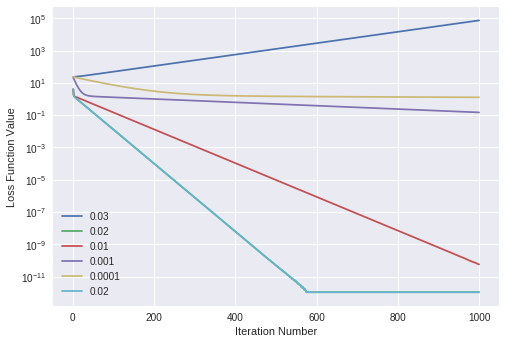

6.0557029247283936


In [0]:
# Exercise N.1
import numpy as N
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import tensorflow as tf
import matplotlib.pyplot as plt
import time

cpu_set = '/gpu:0'

# NOTE: We have used the term 'cpu' to avoid writing the whole code again
# The above line assigns 'gpu:0' to the CPU_SET variable

# Exercise 1: 
# –
# Try 
# GradientDescentOptimizer with different steps
# –
# Check out other descent methods (look for options online)
# –

#     GradientDescentOptimizer
#     AdagradOptimizer
#     MomentumOptimizer
#     AdamOptimizer
#     FtrlOptimizer
#     RMSPropOptimizer


# Represent these extra experiments plus the Gradient Descent with 
# 0.01 step

# GradientDescentOptimizer

# x = tf.placeholder(tf.float32, shape=[None, 784])
# y_ = tf.placeholder(tf.float32, shape=[None, 10])


start= time.time()

W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.03, 0.02, 0.01, 0.001, 0.0001,0.02]:

        print(l_r)
        optimizer = tf.train.GradientDescentOptimizer(l_r)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
    #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
    #         print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst.append(curr_loss)
      

    # pylab.plot(x, y1, '-b', label='sine')
    # pylab.plot(x, y2, '-r', label='cosine')
    # pylab.legend(loc='upper left')   
        plt.plot(steps,curr_loss_lst,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')

    plt.show()
    
end= time.time()
print(end- start)


# CPU: 6.49965, GPU: 

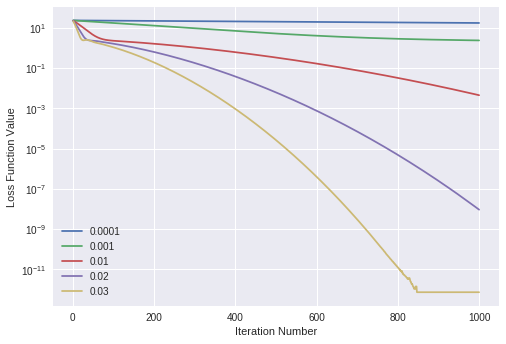

5.443470001220703


In [0]:
# ADAM Optimizer

start= time.time()
W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:

        optimizer = tf.train.AdamOptimizer(l_r)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst2 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst2.append(curr_loss)




        plt.plot(steps,curr_loss_lst2,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')

    plt.show()
end= time.time()

print(end - start)

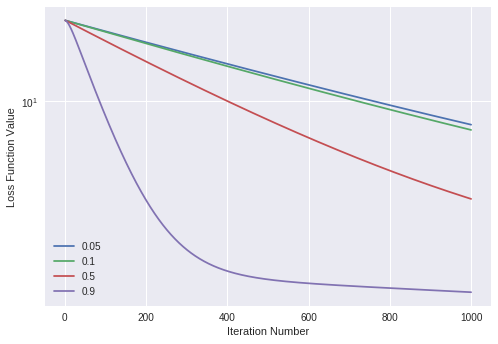

4.192266225814819


In [0]:
# Momentum Optimizer

start= time.time()
W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))


# optimizer


decay_rate = 0.00005
starter_learning_rate = 0.000009
init_momentum = 0.9
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,10000, decay_rate, staircase=True)

with tf.device(cpu_set):
    for mom in [0.05, 0.1, 0.5, 0.9]:

        optimizer = tf.train.MomentumOptimizer(learning_rate,mom)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst3 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst3.append(curr_loss)

        # plt.plot(steps,curr_loss_lst, label = 'Momentum Optimizer')
        # plt.yscale('log')
        # plt.grid(True)
        # plt.xlabel('Iteration Number')
        # plt.ylabel('Loss Function Value')

        plt.plot(steps,curr_loss_lst3,label= str(mom))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
    plt.show()
end= time.time()

print(end- start)

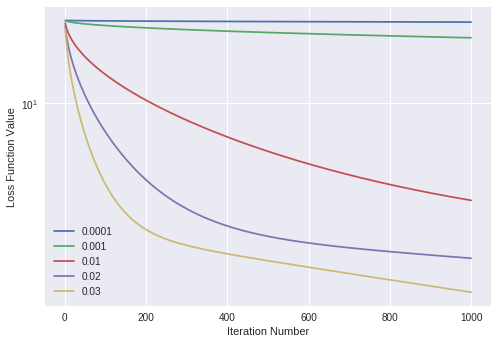

5.497457265853882


In [0]:
# AdagradOptimizer

start= time.time()
W = tf.Variable([.3],dtype = tf.float32)
b = tf.Variable([-.3],dtype = tf.float32)
x = tf.placeholder(tf.float32)
linear_model = W*x + b
y = tf.placeholder(tf.float32)

#loss
loss = tf.reduce_sum(tf.square(linear_model - y))
# optimizer

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:

        optimizer = tf.train.AdagradOptimizer(l_r,0.1)
        train = optimizer.minimize(loss)

        #training data
        x_train = [1,2,3,4]
        y_train = [0, -1,-2,-3]

        #training loop

        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        # print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))

        curr_loss_lst4 = []
        steps = N.linspace(1,1000,1000)
        steps = list(steps)

        for i in range(1000):
            sess.run(train,{x:x_train,y:y_train})
            curr_W, curr_b, curr_loss = sess.run([W,b,loss],{x:x_train,y:y_train})
        #     print('W:%s b: %s loss: %s'%(curr_W,curr_b,curr_loss))
            curr_loss_lst4.append(curr_loss)

        plt.plot(steps,curr_loss_lst4,label= str(l_r))
        plt.yscale('log')
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Loss Function Value')
        plt.legend(loc='lower left')
    plt.show()
end= time.time()

print(end- start)

<function matplotlib.pyplot.show>

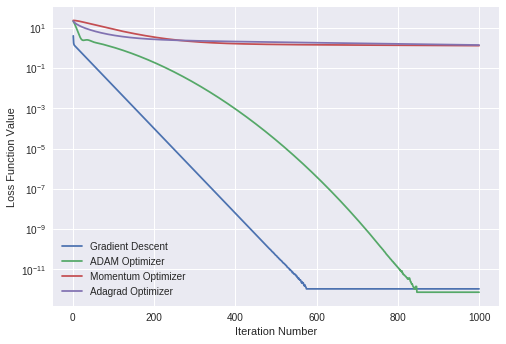

In [0]:
plt.plot(steps,curr_loss_lst, label = 'Gradient Descent')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst2, label = 'ADAM Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst3,label = 'Momentum Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.plot(steps,curr_loss_lst4,label = 'Adagrad Optimizer')
plt.yscale('log')
plt.grid(True)
plt.xlabel('Iteration Number')
plt.ylabel('Loss Function Value')
plt.legend(loc='lower left')

plt.show

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Training
test accuracy 0.9199
Training


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


test accuracy 0.904
Training
test accuracy 0.8531
Training
test accuracy 0.918


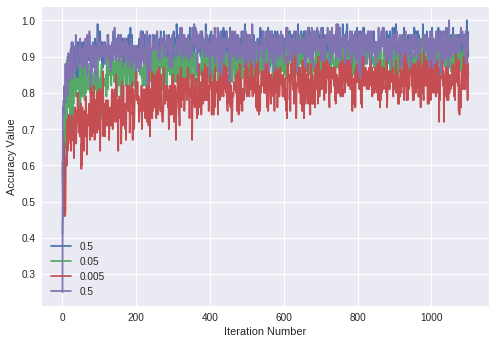

9.474375009536743


In [0]:
# Exercise 2

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
import numpy as N
import tensorflow as tf
data = mnist.train.images



n_train = data.shape[0]
batch_n = 100 
epochs = 2
iterations = int(n_train/batch_n)*epochs


start= time.time()

x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices = [1]))

with tf.device(cpu_set):

    for l_r in [0.5,0.05, 0.005, 0.5]:

        train_step = tf.train.GradientDescentOptimizer(l_r).minimize(cross_entropy)
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        sess = tf.InteractiveSession()

        # tf.global_variables_initializer().run()
        init = tf.global_variables_initializer()
        sess.run(init)

        # TRAINING PHASE
        print('Training')
        steps = N.linspace(1,iterations,iterations)
        steps = list(steps)
        acc_lst = []

        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            batch_xs = batch[0]
            batch_ys = batch[1]
            sess.run(train_step,feed_dict = {x:batch_xs,y_:batch_ys})
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y_: batch_ys})
    #         print('step %d, training accuracy %g' % (i, train_accuracy))
            acc_lst.append(train_accuracy)
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

        plt.plot(steps,acc_lst,label= str(l_r))
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Accuracy Value')
        plt.legend(loc='lower left')

    plt.show()
end= time.time()

print(end- start)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training
test accuracy 0.8566
Training
test accuracy 0.9151
Training
test accuracy 0.9243
Training
test accuracy 0.9083
Training
test accuracy 0.098


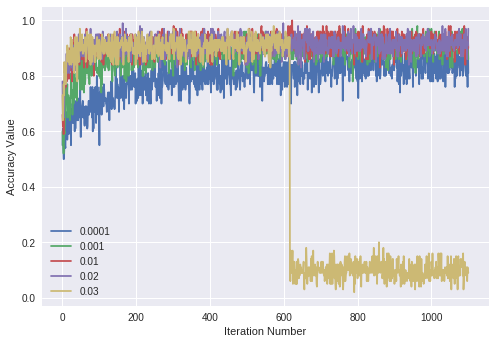

12.616058588027954


In [0]:
# With AdamOptimizer

n_train = data.shape[0]
batch_n = 100 
epochs = 2
iterations = int(n_train/batch_n)*epochs

start= time.time()
x = tf.placeholder(tf.float32,[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices = [1]))

with tf.device(cpu_set):

    for l_r in [0.0001,0.001,0.01,0.02,0.03]:


        train_step = tf.train.AdamOptimizer(l_r).minimize(cross_entropy)
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        sess = tf.InteractiveSession()

        # tf.global_variables_initializer().run()
        init = tf.global_variables_initializer()
        sess.run(init)

        # TRAINING PHASE
        print('Training')
        steps = N.linspace(1,iterations,iterations)
        steps = list(steps)
        acc_lst = []

        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            batch_xs = batch[0]
            batch_ys = batch[1]
            sess.run(train_step,feed_dict = {x:batch_xs,y_:batch_ys})
            train_accuracy = accuracy.eval(feed_dict={x: batch_xs, y_: batch_ys})
    #         print('step %d, training accuracy %g' % (i, train_accuracy))
            acc_lst.append(train_accuracy)
        correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

        plt.plot(steps,acc_lst,label= str(l_r))
        plt.grid(True)
        plt.xlabel('Iteration Number')
        plt.ylabel('Accuracy Value')
        plt.legend(loc='lower left')

    plt.show()
end= time.time()

print(end- start)

In [0]:
# Exercise 3 

n_train = data.shape[0]
batch_n = 100 
epochs = 10
iterations = int(n_train/batch_n)*epochs

start= time.time()
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

with tf.device(cpu_set):
    W_conv1 = weight_variable([5, 5, 1, 32])
    b_conv1 = bias_variable([32])
    x_image = tf.reshape(x, [-1, 28, 28, 1])
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    W_conv2 = weight_variable([5, 5, 32, 64])
    b_conv2 = bias_variable([64])

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    W_fc1 = weight_variable([7 * 7 * 64, 1024])
    b_fc1 = bias_variable([1024])

    h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

    keep_prob = tf.placeholder(tf.float32)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    W_fc2 = weight_variable([1024, 10])
    b_fc2 = bias_variable([10])

    y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    with tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True)) as sess:
#     sess.run(tf.global_variables_initializer())
        init = tf.global_variables_initializer()
        sess.run(init)
        for i in range(iterations):
            batch = mnist.train.next_batch(batch_n)
            if i % 100 == 0:
                train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
                print('step %d, training accuracy %g' % (i, train_accuracy))
            train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

        print('test accuracy %g' % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
end= time.time()

print(end- start)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

step 0, training accuracy 0.1
step 100, training accuracy 0.83
step 200, training accuracy 0.9
step 300, training accuracy 0.97
step 400, training accuracy 0.94
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.95
step 800, training accuracy 0.97
step 900, training accuracy 0.93
step 1000, training accuracy 0.97
step 1100, training accuracy 0.93
step 1200, training accuracy 0.95
step 1300, training accuracy 0.94
step 1400, training accuracy 0.97
step 1500, training accuracy 0.98
step 1600, training accuracy 1
step 1700, training accuracy 0.95
step 1800, training accuracy 0.96
step 1900, training accuracy 0.97
step 2000, training accuracy 0.97
step 2100, training accuracy 0.99
step 2200, training accuracy 0.98
step 2300, training accuracy 0.98
step 2400,